<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>

# **HR Attrition**

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats


############################################ FEATURE SELECTION ############################################
!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

############################################## PREPROCESSING ##############################################
from sklearn.preprocessing import MinMaxScaler

################################################# MODELS ##################################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

######################################### DECISION TREES PLOTS ############################################
# in anaconda prompt: conda install python-graphviz
!pip install pydotplus
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import brier_score_loss

<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>
    
# **1. EDA - Exploratory Data Analysis** </font></a>


<a class="anchor" id="2nd-bullet">
<font color = '#2f4bd6ff'>
    
## **1.1. Data Upload** </font></a>


In section 1.1 we import the database "HR_Attrition_Dataset.csv".

In [2]:
df = pd.read_csv("HR_Attrition_Dataset.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.2 Initial characterization of the database** </font></a>

The database has a size of 1,470 rows and 35 columns, with no duplicate records identified. Regarding the types of variables, it was found that the dataset is composed of 35 variables, of which 9 are categorical and 26 are numerical.

The target variable is “Attrition”.

In [4]:
# Describe dataset structure
df.shape

(1470, 35)

In [3]:
# Verify the existance of null-values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null-values

In [9]:
# Verify the existance of duplicate values
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


There are no duplicate values

In [10]:
# Check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
#Set Index
df.set_index(keys=df['EmployeeNumber'],inplace=True)

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.3  Basic exploration of the Data Frame and initial preprocessing** </font></a>

An initial exploration of the training data was carried out with the aim of obtaining an overall view of the dataset’s contents and identifying any potential preprocessing needs.
This step was essential to understand the data structure and to detect inconsistencies, missing values, or duplicates that could compromise the quality of the subsequent analysis.

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
#Analyze the main statistics of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [14]:
#Analyze the main statistics of the categorical variables
df.describe(include=['object']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


'EmployeeCount' is always = 1 (std = 0) - remove

'StandardHours' is always = 80 (std = 0) - remove

'Over18' is always =1 - remove

In [5]:
# Drop Columns
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18']
df.drop(columns=cols_to_drop, inplace=True)

df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [18]:
# Observe Unique Values
# List of columns
columns = df.columns.tolist()

# Unique Values
for col in columns:
    unique_vals = df[col].unique()
    print(f"{col} → {unique_vals}")


Age → [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition → ['Yes' 'No']
BusinessTravel → ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate → [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **2. Visual Exploration** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.1 Target Variable** </font></a>

,Nr of Employees,%
Attrition,,
No,1233,83.88 %
Yes,237,16.12 %


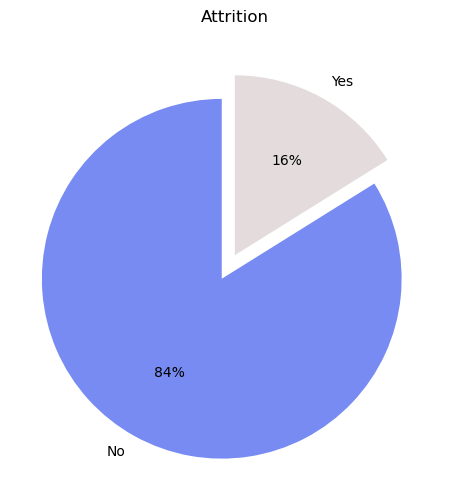

In [19]:
# Target Variable Distribution
a = df['Attrition'].value_counts().sort_index()
b = df['Attrition'].value_counts(normalize=True) * 100
b = b.map('{:,.2f} %'.format).sort_index()

# Proportions
df_temp = pd.concat([a,b],axis = 1)
df_temp.columns = ['Nr of Employees', '%']
display(df_temp)
Attrition_Employee = df.groupby(['Attrition'])['Attrition'].count()

# Create a pie chart 
Attrition_Employee.plot(kind='pie', labels = ['No', 'Yes'],subplots=True, figsize=(5, 5),explode = (0.15 , 0),startangle = 90,autopct = '%1.f%%', colors=["#778bf2ff", "#e4dcdcff"])
plt.title("Attrition")
plt.ylabel('')
#tight_layout: adjusts subplot to fit in to the figure are
plt.tight_layout()
plt.show()



Employee Attrition:

    83.9% of employees stayed with the company.

    16.1% of employees left the company.

The dataset is imbalanced toward those who stayed.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.2 Categorical Variables** </font></a>

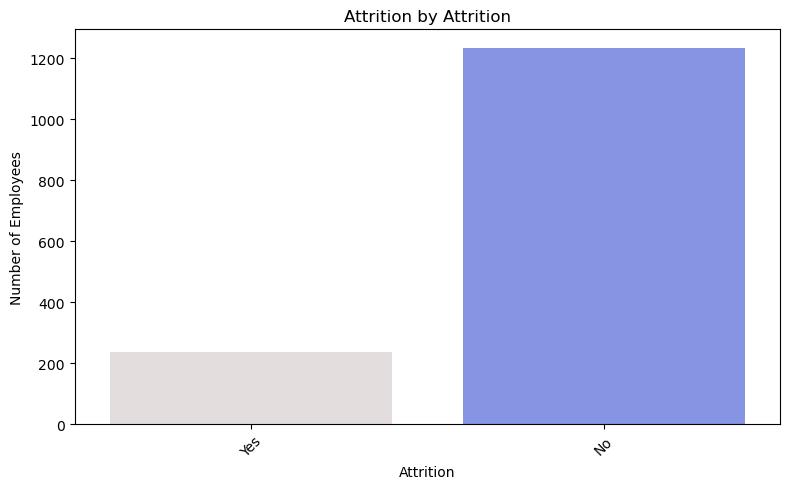

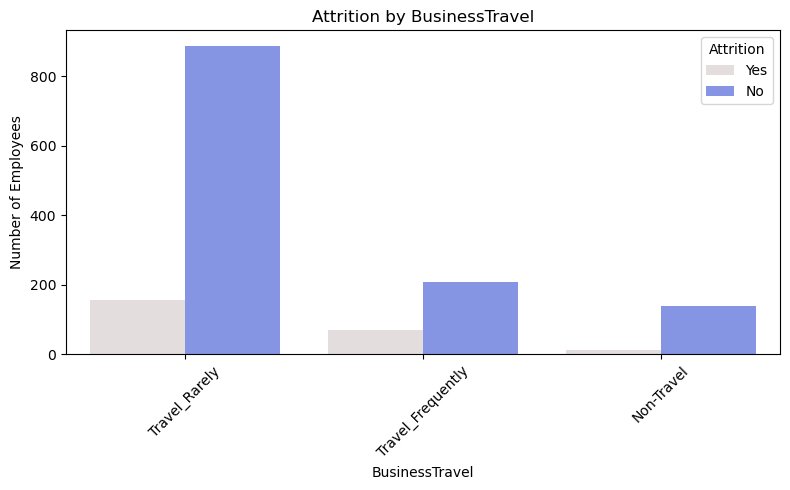

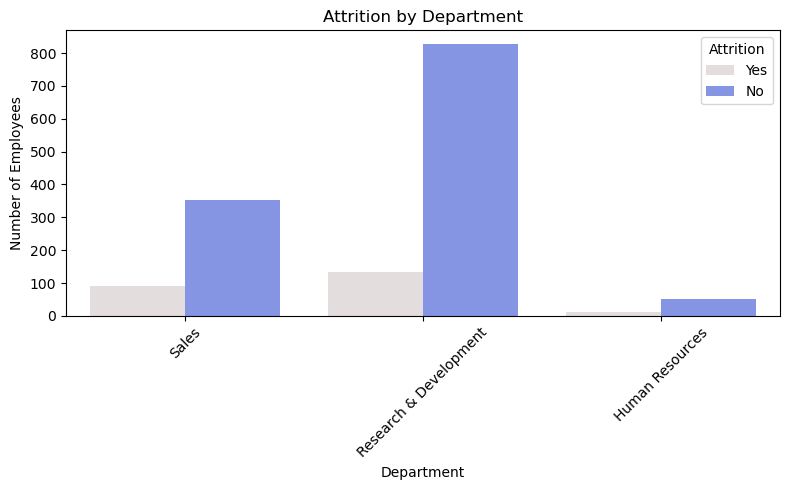

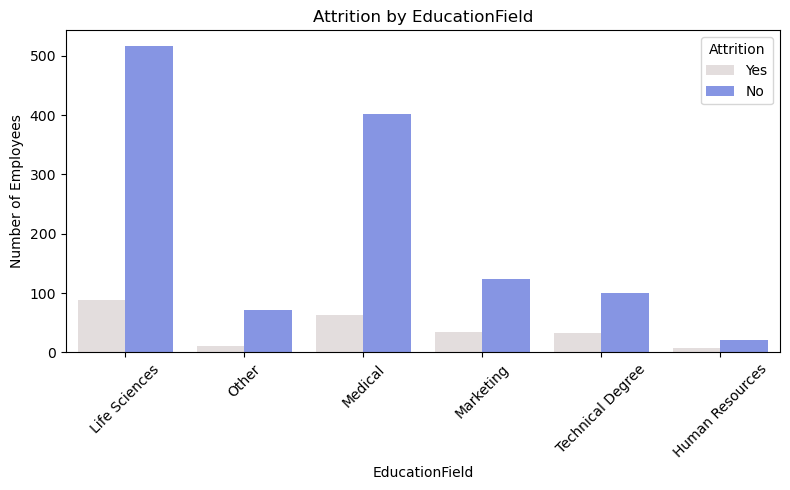

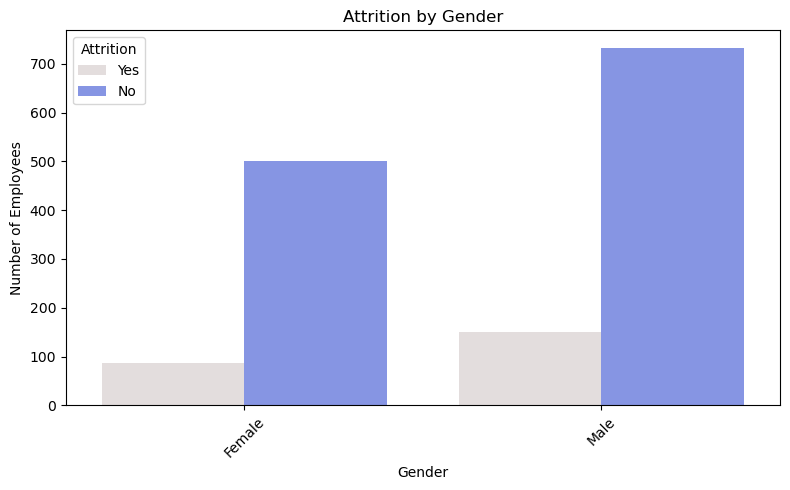

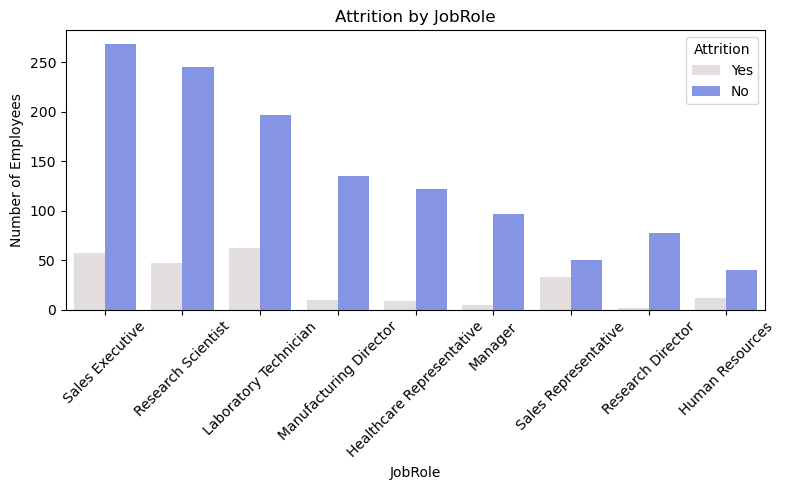

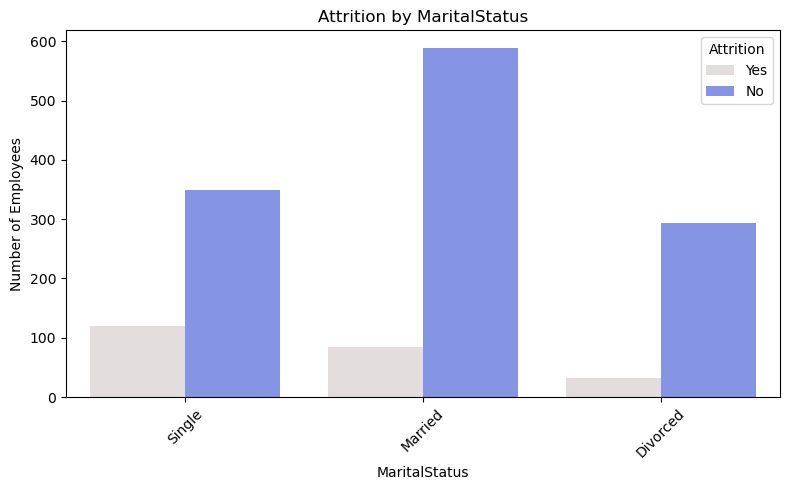

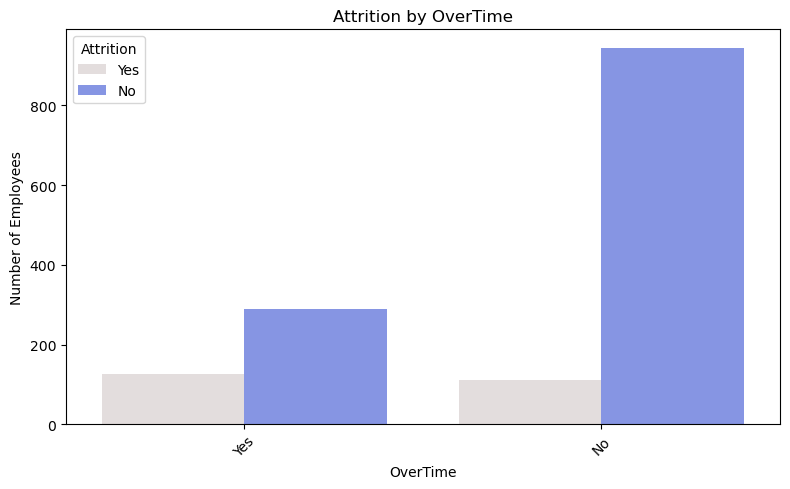

In [20]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue="Attrition", palette={"Yes": "#e4dcdcff", "No": "#778bf2ff"})
    plt.title(f"Attrition by {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Employees")
    plt.xticks(rotation=45)


    # Remove plt.legend() call
    plt.tight_layout()
    plt.show()


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.3 Numerical Variables** </font></a>

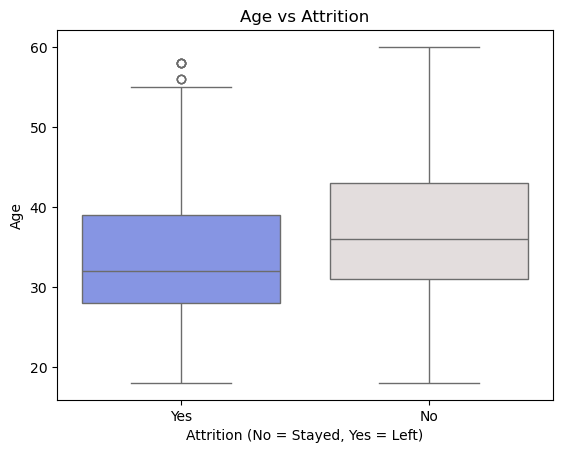

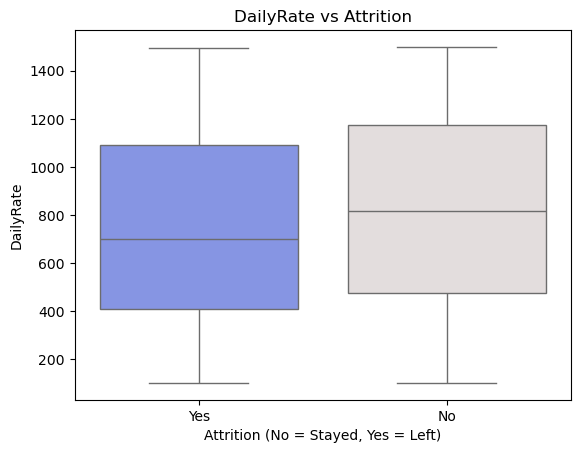

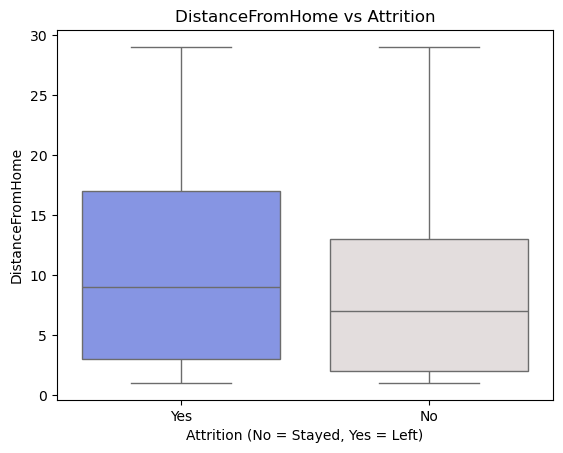

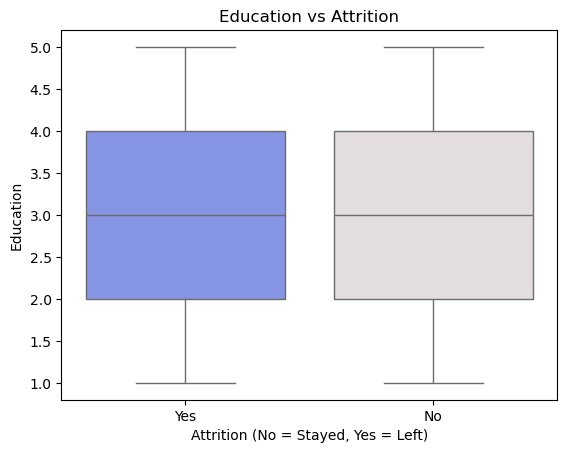

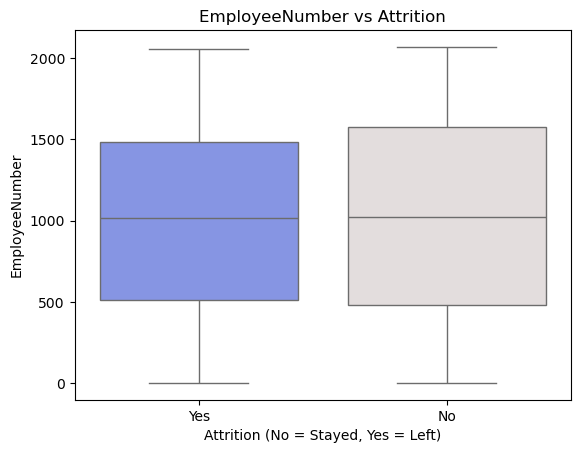

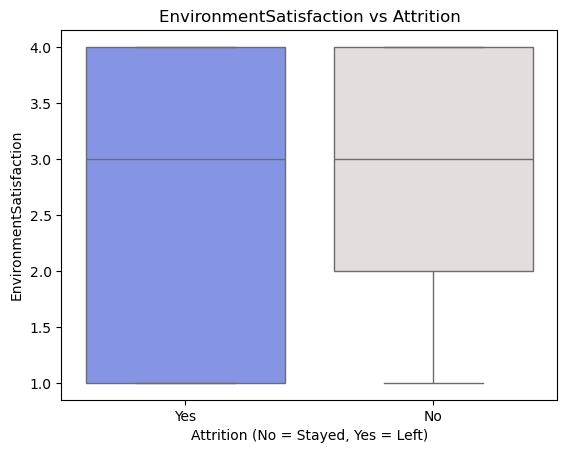

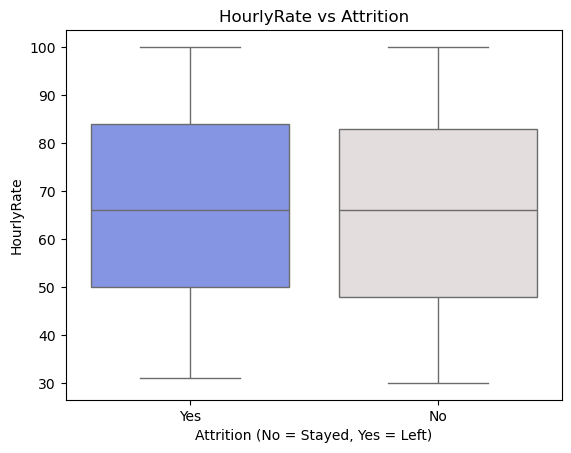

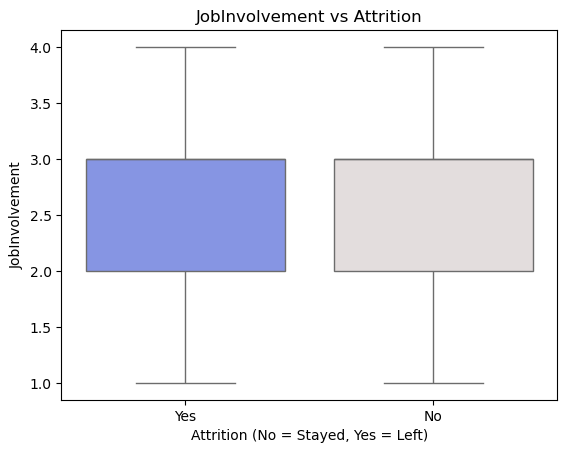

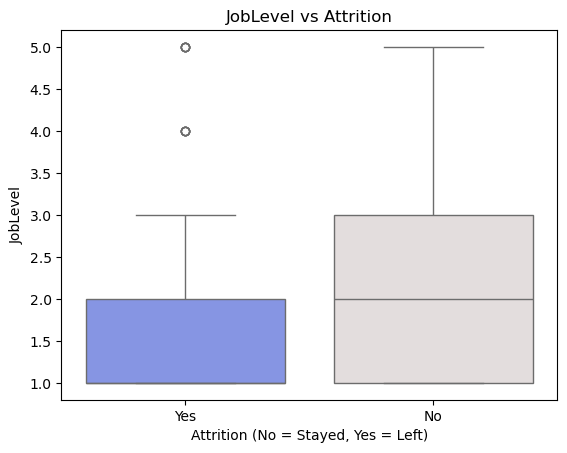

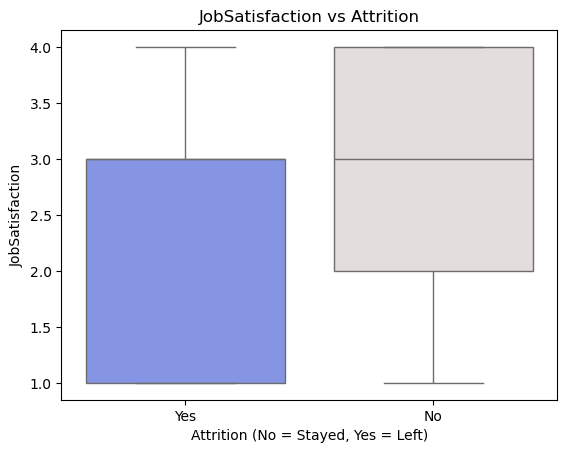

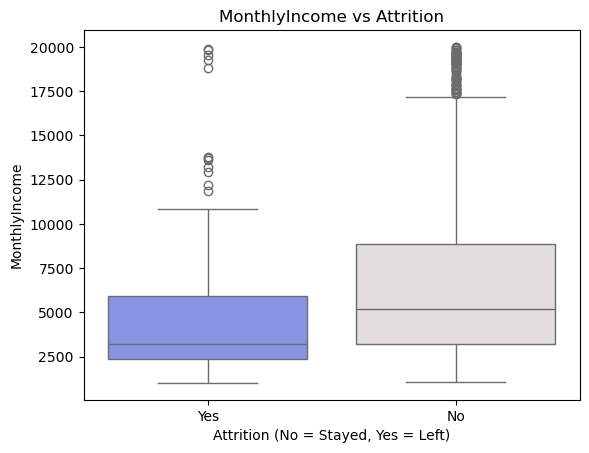

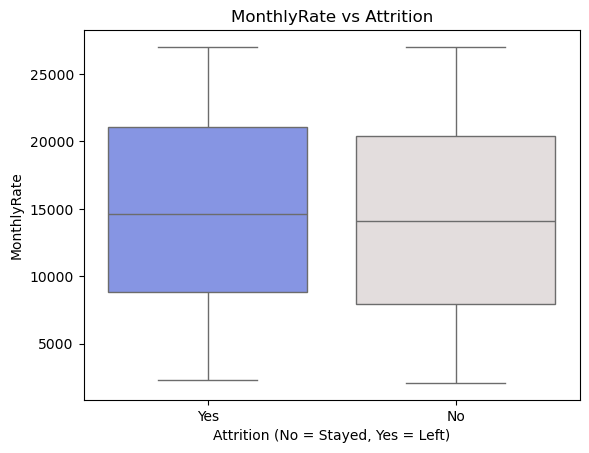

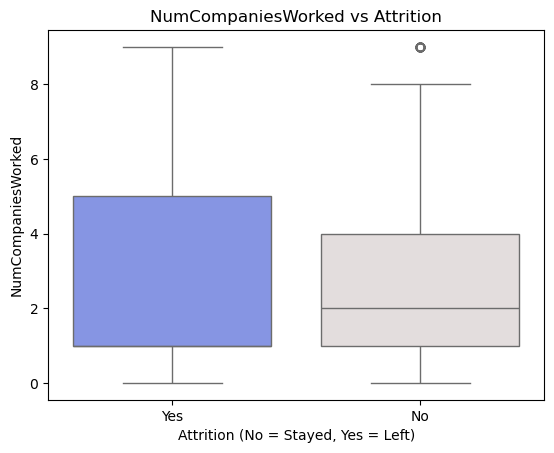

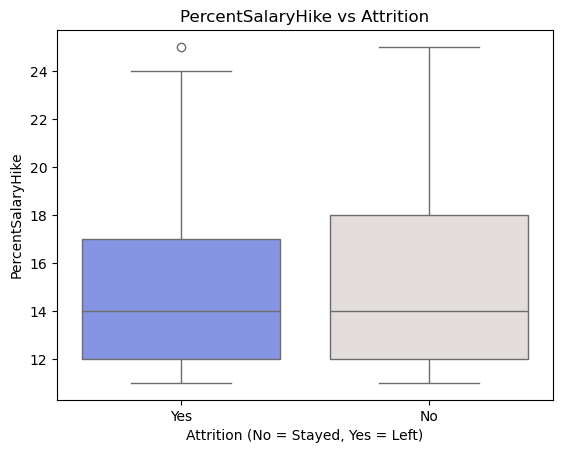

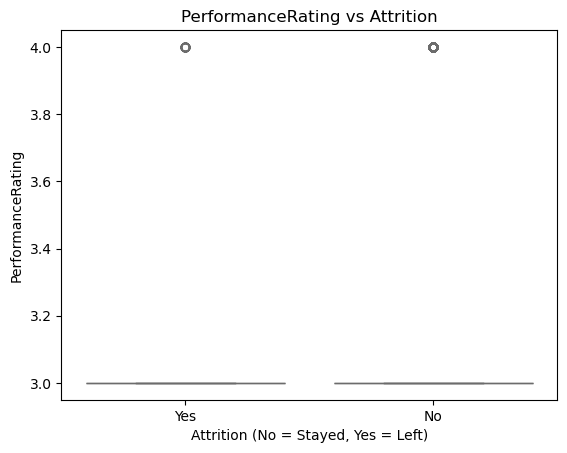

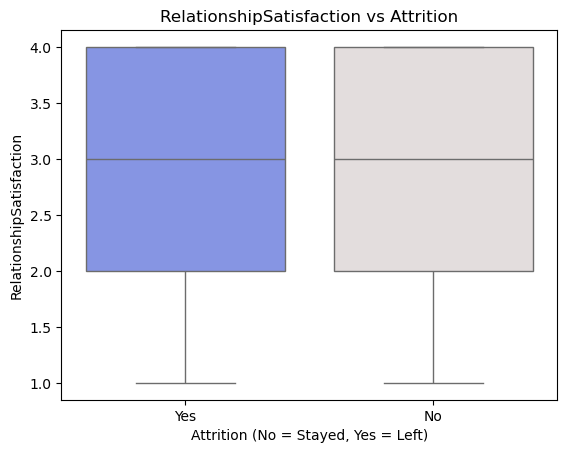

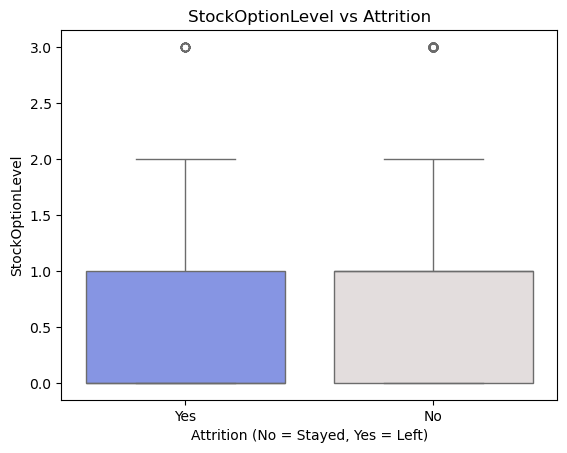

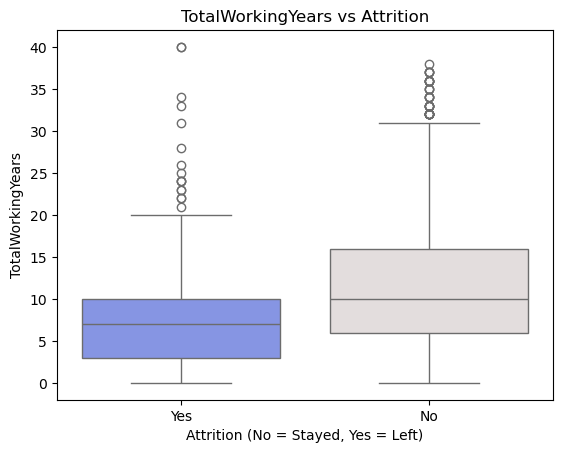

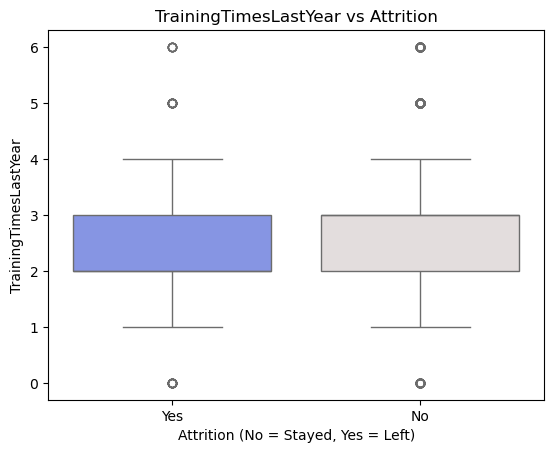

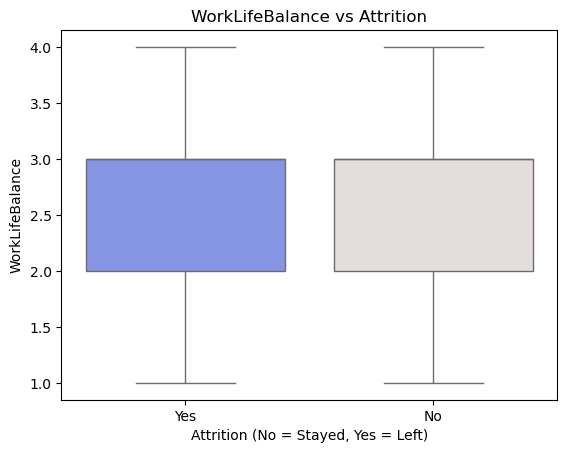

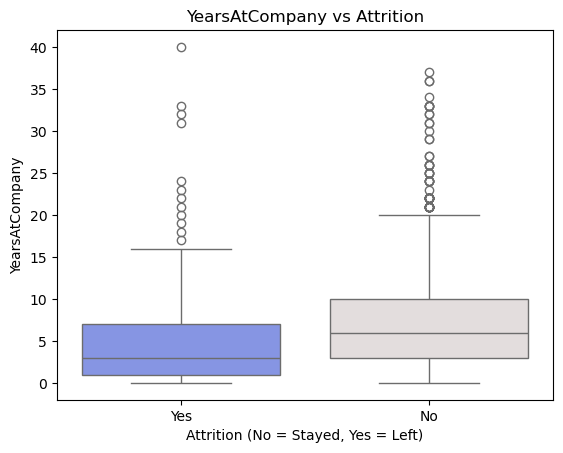

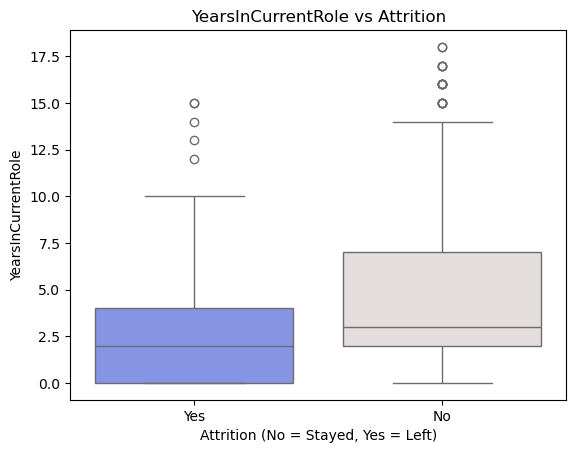

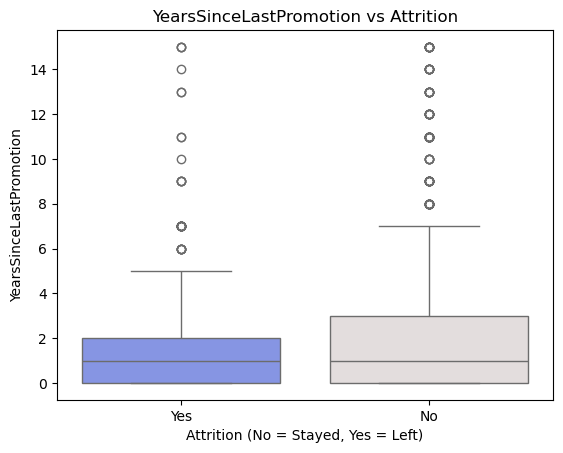

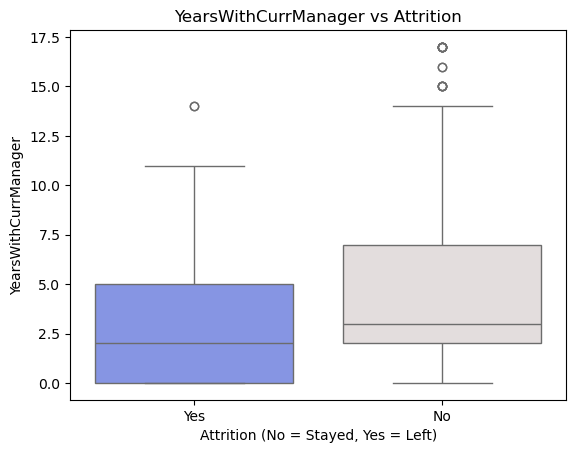

In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=df, x="Attrition", y=col,hue="Attrition", palette=["#778bf2ff", "#e4dcdcff"])
    plt.title(f"{col} vs Attrition")
    plt.xlabel("Attrition (No = Stayed, Yes = Left)")
    plt.ylabel(col)
    plt.show()
  

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.4 Correlation between Variables: Heatmap** </font></a>

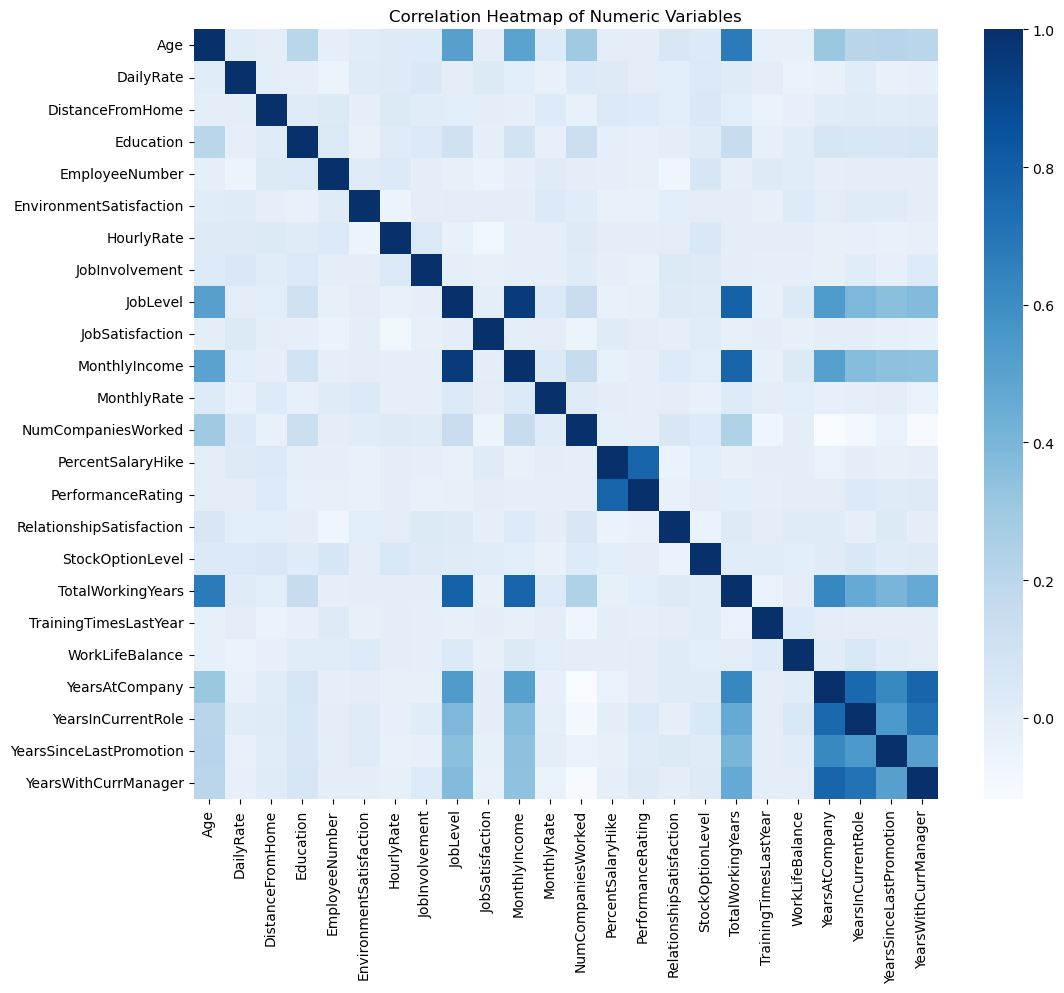

In [22]:
# Pearson Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=False)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

In [23]:
# Compute correlation matrix
corr = df.select_dtypes(include=['int64', 'float64']).corr().abs()  # use absolute values

# Only keep correlations above threshold 
threshold = 0.5
strong_corr = corr.where((corr > threshold) & (corr < 1.0)).stack().reset_index()
strong_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

print(strong_corr)



                 Variable 1               Variable 2  Correlation
0                       Age                 JobLevel     0.509604
1                       Age        TotalWorkingYears     0.680381
2                  JobLevel                      Age     0.509604
3                  JobLevel            MonthlyIncome     0.950300
4                  JobLevel        TotalWorkingYears     0.782208
5                  JobLevel           YearsAtCompany     0.534739
6             MonthlyIncome                 JobLevel     0.950300
7             MonthlyIncome        TotalWorkingYears     0.772893
8             MonthlyIncome           YearsAtCompany     0.514285
9         PercentSalaryHike        PerformanceRating     0.773550
10        PerformanceRating        PercentSalaryHike     0.773550
11        TotalWorkingYears                      Age     0.680381
12        TotalWorkingYears                 JobLevel     0.782208
13        TotalWorkingYears            MonthlyIncome     0.772893
14        

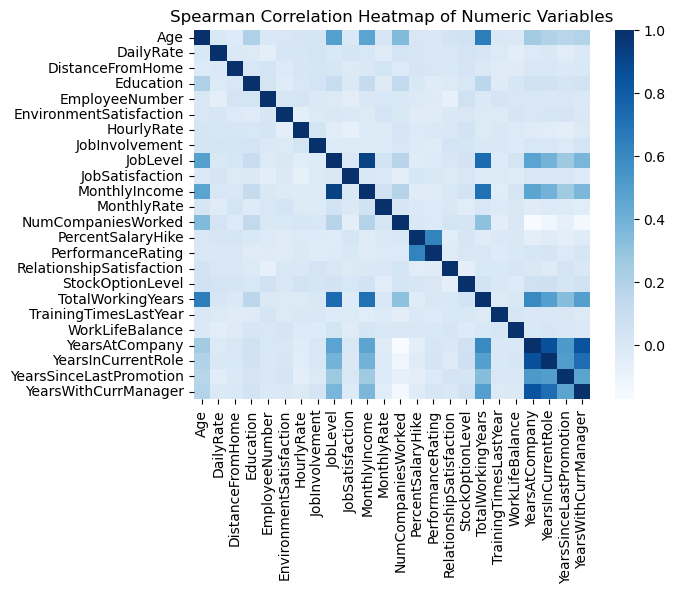

In [24]:
# Spearman correlation
sns.heatmap(df.corr(method='spearman', numeric_only=True), 
            cmap="Blues", 
            annot=False)

plt.title("Spearman Correlation Heatmap of Numeric Variables")
plt.show()

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.5. Outliers** </font></a>

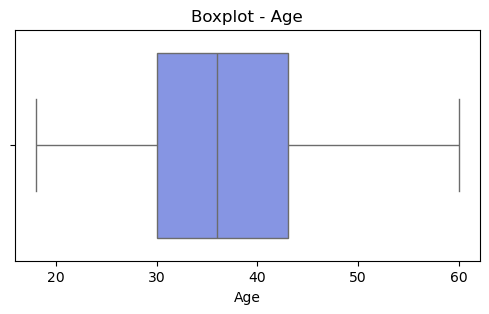

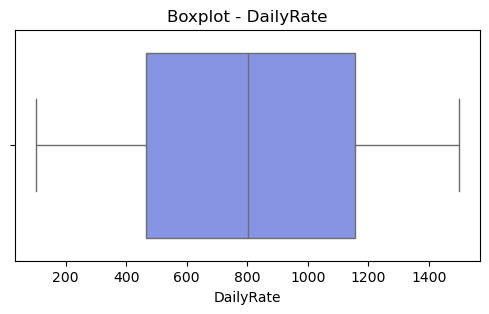

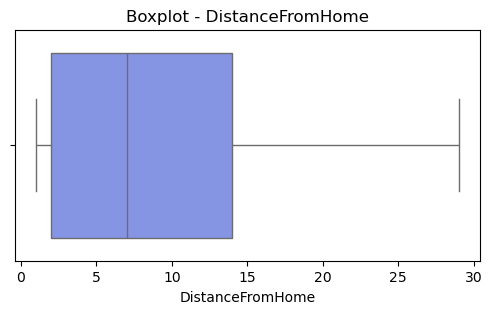

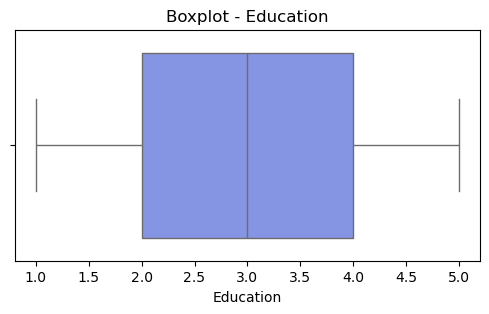

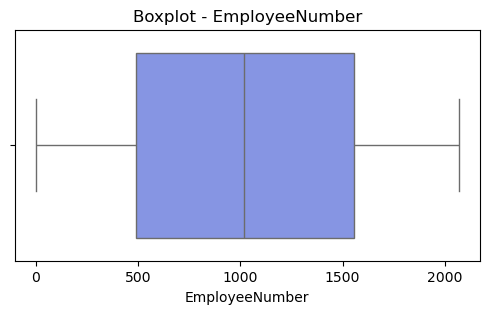

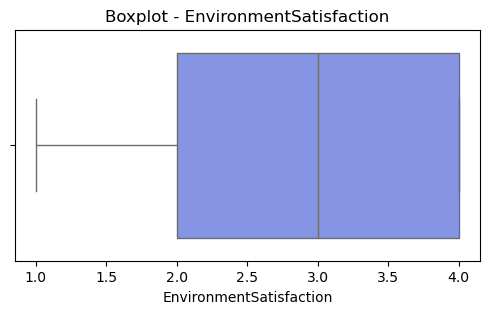

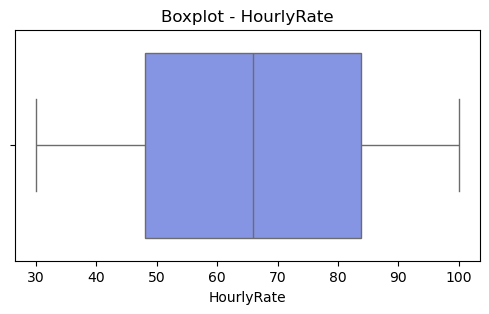

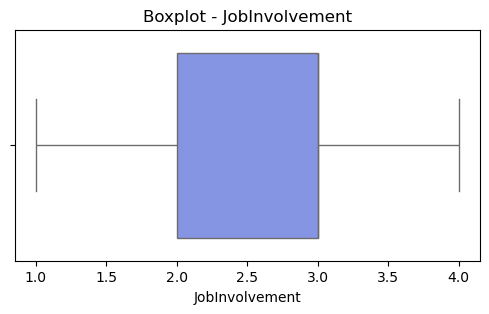

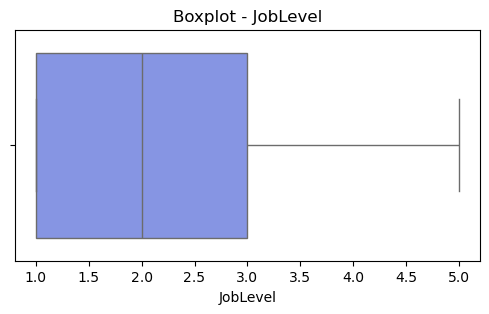

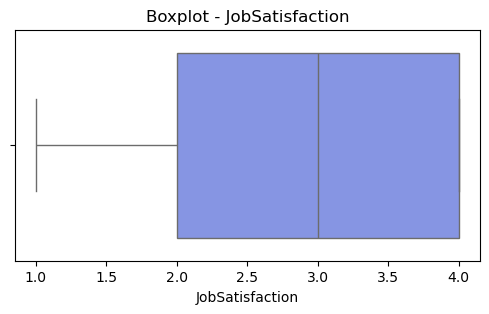

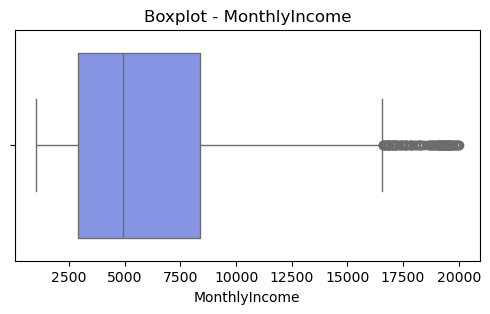

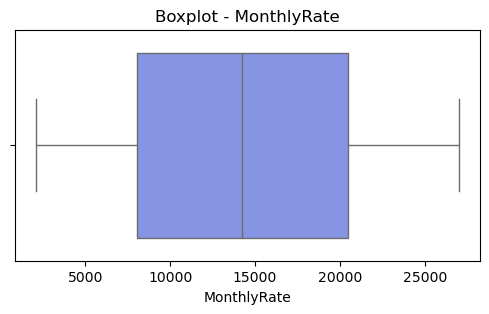

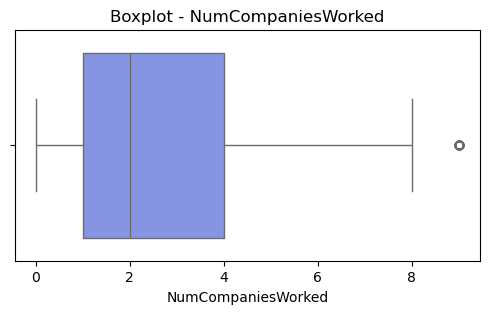

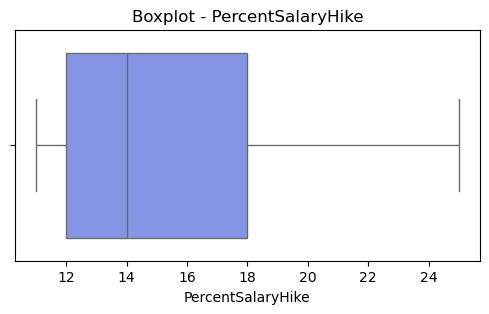

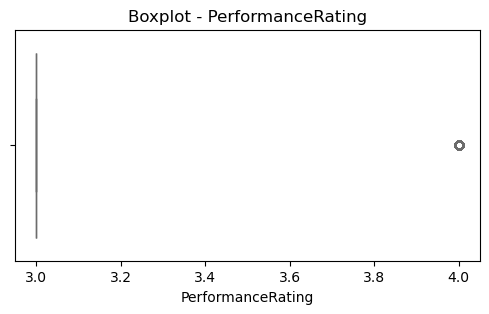

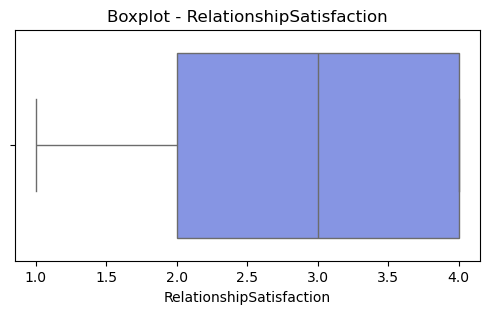

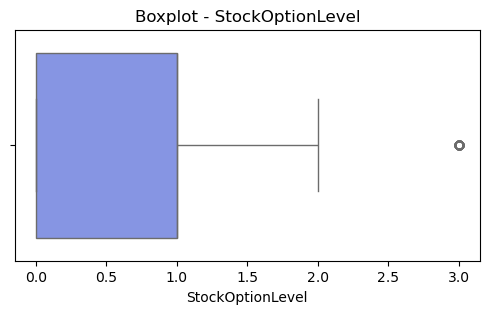

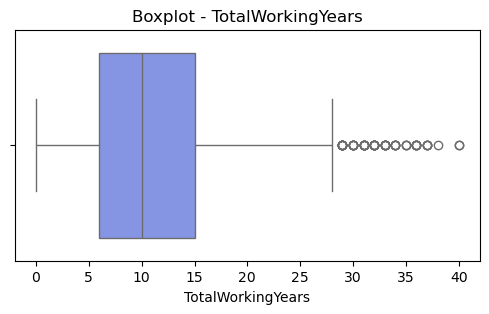

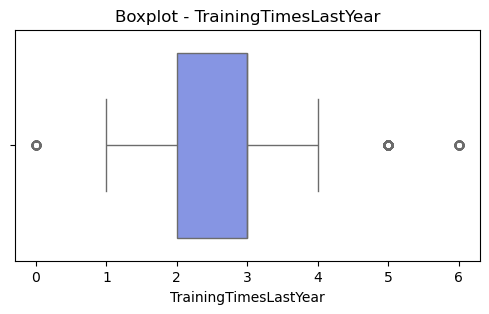

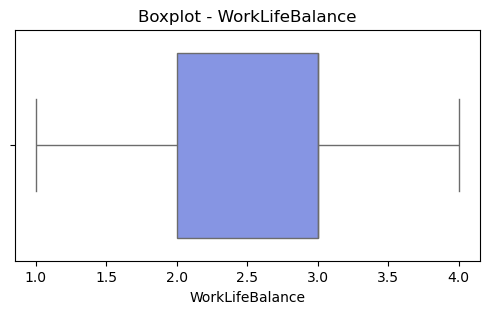

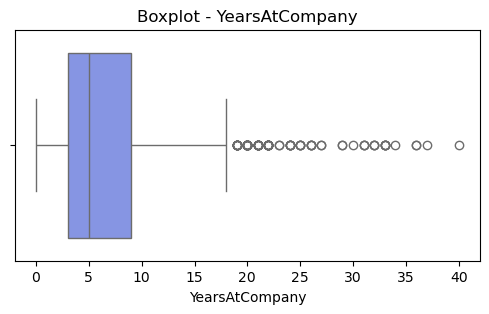

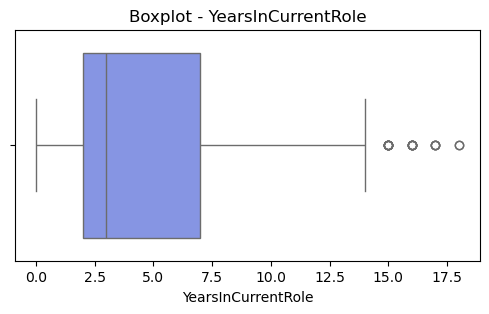

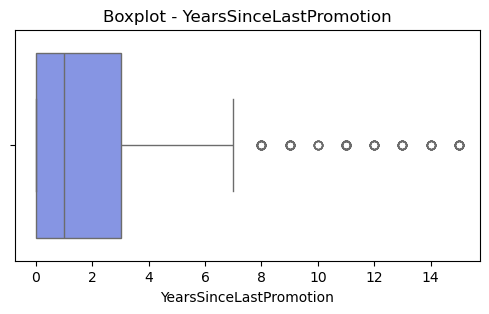

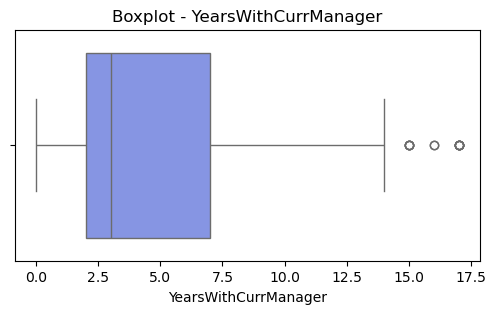

In [25]:
#Outliers
for cols in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[cols], color="#778bf2ff")
    plt.title(f'Boxplot - {cols}')
    plt.show()


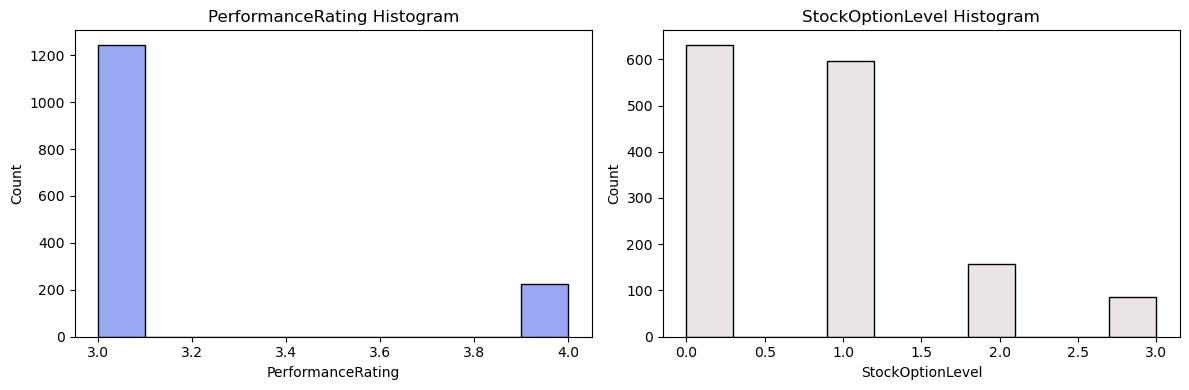

In [26]:
# Histograms for PerformanceRating and StockOptionLevel
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['PerformanceRating'], bins=10, ax=axes[0], color="#778bf2ff")
axes[0].set_title('PerformanceRating Histogram')
sns.histplot(df['StockOptionLevel'], bins=10, ax=axes[1], color ="#e4dcdcff")
axes[1].set_title('StockOptionLevel Histogram')
plt.tight_layout()
plt.show()



Number of employees with PerformanceRating > 3.8: 226
Proportion of high performers who left (Attrition = Yes):
Attrition
No     0.836283
Yes    0.163717
Name: proportion, dtype: float64
Statistical summary of main variables:


,Attrition,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,OverTime
count,226,226.000000,226.000000,226.000000,226.000000,226
unique,2,NaN,NaN,NaN,NaN,2
top,No,NaN,NaN,NaN,NaN,No
freq,189,NaN,NaN,NaN,NaN,161
mean,NaN,6313.893805,11.402655,7.057522,2.323009,NaN
std,NaN,4673.776271,7.800387,5.802012,3.457308,NaN
min,NaN,1052.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,2748.750000,6.000000,3.000000,0.000000,NaN
50%,NaN,4777.000000,10.000000,5.000000,1.000000,NaN
75%,NaN,8450.750000,14.750000,10.000000,3.000000,NaN


Distribution by JobRole:
JobRole
Research Scientist           49
Laboratory Technician        42
Sales Executive              41
Manufacturing Director       27
Healthcare Representative    20
Manager                      20
Sales Representative         12
Research Director             8
Human Resources               7
Name: count, dtype: int64
Distribution by Department:
Department
Research & Development    156
Sales                      61
Human Resources             9
Name: count, dtype: int64


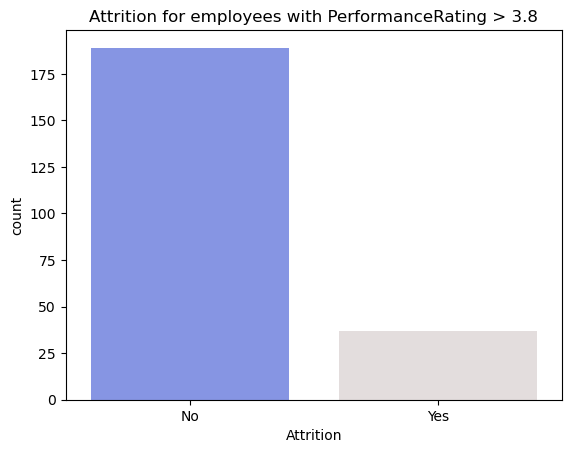

In [27]:
# Filter employees with PerformanceRating > 3.8
high_perf = df[df['PerformanceRating'] > 3.8]

# General information
print(f"Number of employees with PerformanceRating > 3.8: {len(high_perf)}")
print("Proportion of high performers who left (Attrition = Yes):")
print(high_perf['Attrition'].value_counts(normalize=True))

# Statistical summary of key variables
print("Statistical summary of main variables:")
display(high_perf[['Attrition', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime']].describe(include='all'))

# Distribution by JobRole
print("Distribution by JobRole:")
print(high_perf['JobRole'].value_counts())

# Distribution by Department
print("Distribution by Department:")
print(high_perf['Department'].value_counts())

# Visualization of attrition rate for high performers
sns.countplot(data=high_perf, x='Attrition', palette={"Yes": "#e4dcdcff", "No": "#778bf2ff"})
plt.title("Attrition for employees with PerformanceRating > 3.8")
plt.show()

In [28]:
# Comparative analysis: high performers (PerformanceRating > 3.8) vs others

# Split the dataset
rest = df.drop(high_perf.index)

# Select columns for comparison
cols_compare = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'OverTime']

# Function to summarize statistics
def summarize_stats(data, cols):
    summary = {}
    for col in cols:
        if col != 'OverTime':
            summary[col] = {
                'mean': data[col].mean(),
                'max': data[col].max(),
                'min': data[col].min()
            }
        else:
            # For OverTime, show proportion of 'Yes'
            summary[col] = {
                'OverTime_Yes (%)': (data[col] == 'Yes').mean() * 100
            }
    return pd.DataFrame(summary).T

print("High Performers (PerformanceRating > 3.8):")
display(summarize_stats(high_perf, cols_compare))

print("Other Employees:")
display(summarize_stats(rest, cols_compare))

High Performers (PerformanceRating > 3.8):


,mean,max,min,OverTime_Yes (%)
MonthlyIncome,6313.893805,19973.0,1052.0,NaN
TotalWorkingYears,11.402655,37.0,1.0,NaN
YearsAtCompany,7.057522,36.0,0.0,NaN
YearsSinceLastPromotion,2.323009,15.0,0.0,NaN
OverTime,NaN,NaN,NaN,28.761062


Other Employees:


,mean,max,min,OverTime_Yes (%)
MonthlyIncome,6537.274116,19999.0,1009.0,NaN
TotalWorkingYears,11.257235,40.0,0.0,NaN
YearsAtCompany,6.999196,40.0,0.0,NaN
YearsSinceLastPromotion,2.163183,15.0,0.0,NaN
OverTime,NaN,NaN,NaN,28.215434


In [29]:
# Information about specific employees
print("Employee with YearsAtCompany = 40:")
display(df[df['YearsAtCompany'] == 40][['EmployeeNumber', 'JobRole', 'Department', 'TotalWorkingYears', 'YearsInCurrentRole', 'PerformanceRating', 'StockOptionLevel','Attrition']])

print("Employee with TotalWorkingYears = 40:")
display(df[df['TotalWorkingYears'] == 40][['EmployeeNumber', 'JobRole', 'Department', 'YearsAtCompany', 'YearsInCurrentRole', 'PerformanceRating', 'StockOptionLevel','Attrition']])

print("Employee with YearsInCurrentRole = 18:")
display(df[df['YearsInCurrentRole'] == 18][['EmployeeNumber', 'JobRole', 'Department', 'YearsAtCompany', 'TotalWorkingYears', 'PerformanceRating', 'StockOptionLevel','Attrition']])

Employee with YearsAtCompany = 40:


,EmployeeNumber,JobRole,Department,TotalWorkingYears,YearsInCurrentRole,PerformanceRating,StockOptionLevel,Attrition
EmployeeNumber,,,,,,,,
165,165,Healthcare Representative,Research & Development,40,10,3,1,Yes


Employee with TotalWorkingYears = 40:


,EmployeeNumber,JobRole,Department,YearsAtCompany,YearsInCurrentRole,PerformanceRating,StockOptionLevel,Attrition
EmployeeNumber,,,,,,,,
165,165,Healthcare Representative,Research & Development,40,10,3,1,Yes
825,825,Research Director,Research & Development,31,15,3,0,Yes


Employee with YearsInCurrentRole = 18:


,EmployeeNumber,JobRole,Department,YearsAtCompany,TotalWorkingYears,PerformanceRating,StockOptionLevel,Attrition
EmployeeNumber,,,,,,,,
162,162,Research Director,Research & Development,20,23,3,0,No
259,259,Manager,Research & Development,33,34,3,1,No


### Outlier Analysis — Summary & Conclusions

We analyzed several numeric variables that initially showed potential outliers in the boxplots compared with the target variable (`Attrition`):  
`MonthlyIncome`, `PerformanceRating`, `StockOptionLevel`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager`.

#### Phase 1 — General Variable Exploration
After re-examining these variables individually, two stood out: **PerformanceRating** and **StockOptionLevel**.  
Histograms of `PerformanceRating` revealed two distinct employee groups:
1. **Others:** 3.0 < `PerformanceRating` < 3.2  
2. **High Performers (h_perf):** 3.8 < `PerformanceRating` < 4.0  

For the 226 high performers (out of 1,470 employees), we compared several factors (`Attrition`, `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, `YearsSinceLastPromotion`, `OverTime`, `JobRole`, and `Department`) against the rest of the population (1,244 employees).  
Key insights:
- **Attrition:** similar distribution between groups.  
- **MonthlyIncome:** very close across groups, suggesting performance is not linked to income levels.  
- **TotalWorkingYears** and **YearsSinceLastPromotion:** similar mean, min, and max values.  
- **OverTime:** comparable share (~28%) in both groups.  
- Most high performers belong to **Research & Development (156)**, followed by **Sales (61)** and **HR (9)**.  

**Conclusion (PerformanceRating):**  
No significant correlations were found between high performance (>3.8) and other variables — consistent with the heatmap, where `PerformanceRating` showed no strong associations across the dataset.

---

#### Phase 2 — Specific Employee Cases
A few employees showed extreme but contextually valid values:
1. **YearsAtCompany = 40:** single employee, `Attrition = Yes` (likely retirement).  
2. **TotalWorkingYears = 40:** two employees (one same as above), both with `Attrition = Yes` — probable retirements.  
3. **YearsInCurrentRole = 18:** two employees with long tenure (20 and 33 years), both still active.  
_All four are from the **Research & Development** department and have a `PerformanceRating = 3`._

**Conclusion (Tenure-related variables):**  
Long tenure in the company, role, or overall career does not indicate data errors — these represent valid senior employees, possibly close to or at retirement age.

---

### General Conclusions
1. Although some extreme values were detected, **none were considered true outliers** in the business context.  
2. The extreme cases (high tenure or high performance) are **consistent with realistic employee profiles** rather than data entry errors.  
3. Removing these values would risk losing meaningful information about experienced or high-performing staff.  
4. Therefore, **no outlier removal or transformation** is recommended at this stage.




<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **3. Data Splitting: Train / Validation / Test sets** </font></a>


In [8]:

# Copy the cleaned dataset
data_model = df.copy()

# Separate features and target
X = data_model.drop(columns='Attrition')
y = data_model['Attrition'].copy()

# --- Step 1: Split Train (70%) and Temp (30%) ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,        # 30% for validation + test
    random_state=42,
    stratify=y            # maintain class proportions
)

# --- Step 2: Split Temp into Validation (15%) and Test (15%) ---
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,        # 50% of 30% → 15% of total
    random_state=42,
    stratify=y_temp
)

# --- Summary ---
print(f"Training size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

# --- Check class distribution ---
print("\nTraining Distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nValidation Distribution:")
print(y_val.value_counts(normalize=True) * 100)

print("\nTest Distribution:")
print(y_test.value_counts(normalize=True) * 100)



Training size: 1029 (70.0%)
Validation size: 220 (15.0%)
Test size: 221 (15.0%)

Training Distribution:
Attrition
No     83.867833
Yes    16.132167
Name: proportion, dtype: float64

Validation Distribution:
Attrition
No     84.090909
Yes    15.909091
Name: proportion, dtype: float64

Test Distribution:
Attrition
No     83.710407
Yes    16.289593
Name: proportion, dtype: float64


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **4. Data Transformation** </font></a>

In [9]:
# 1. Boolean Mapping for target and OverTime
bool_map = {'Yes': 1, 'No': 0, True: 1, False: 0}
y_train = y_train.map(bool_map)
y_val = y_val.map(bool_map)
y_test = y_test.map(bool_map)

# Apply same mapping to OverTime if it exists
for dataset in [X_train, X_val, X_test]:
    if 'OverTime' in dataset.columns:
        dataset['OverTime'] = dataset['OverTime'].map(bool_map)

# --- 2. Ordinal Encoding ---
from sklearn.preprocessing import OrdinalEncoder

# Columns to encode
ordinal_cols = ['BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus']

# Your mapping dictionaries
ordinal_maps = {
    'BusinessTravel': {'Non-Travel': 1, 'Travel_Frequently': 2, 'Travel_Rarely': 3},
    'Department': {'Human Resources': 1, 'Research & Development': 2, 'Sales': 3},
    'EducationField': {'Human Resources': 1, 'Life Sciences': 2, 'Marketing': 3,
                       'Medical': 4, 'Other': 5, 'Technical Degree': 6},
    'Gender': {'Female': 1, 'Male': 2},
    'JobRole': {'Healthcare Representative': 1, 'Human Resources': 2,
                'Laboratory Technician': 3, 'Manager': 4, 'Manufacturing Director': 5,
                'Research Director': 6, 'Research Scientist': 7, 'Sales Executive': 8,
                'Sales Representative': 9},
    'MaritalStatus': {'Divorced': 1, 'Married': 2, 'Single': 3}
}

# Create an OrdinalEncoder with the correct category order
ordinal_encoder = OrdinalEncoder(
    categories=[list(ordinal_maps[col].keys()) for col in ordinal_cols]
)

# Fit on training data
X_train[ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols])

# Transform validation and test sets
X_val[ordinal_cols] = ordinal_encoder.transform(X_val[ordinal_cols])
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols])

# Add 1 to match your 1-based mapping (optional)
X_train[ordinal_cols] += 1
X_val[ordinal_cols] += 1
X_test[ordinal_cols] += 1

# Check the result
print(X_train[ordinal_cols].head())


      BusinessTravel  Department  EducationField  Gender  JobRole  \
853              3.0         2.0             2.0     2.0      7.0   
435              3.0         2.0             4.0     2.0      4.0   
587              3.0         2.0             2.0     1.0      3.0   
1170             2.0         2.0             4.0     2.0      7.0   
159              2.0         3.0             3.0     1.0      9.0   

      MaritalStatus  
853             3.0  
435             2.0  
587             2.0  
1170            3.0  
159             2.0  


In [10]:
# Normalization
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()

# Fit on training data 
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

#  Apply same transformation to validation and test sets 
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


print(f"Scaled columns: {len(numeric_cols)}")
print(f"Example scaled range (train):")
print(X_train[numeric_cols].describe().T[['min', 'max']].head())

Scaled columns: 31
Example scaled range (train):
                  min  max
Age               0.0  1.0
BusinessTravel    0.0  1.0
DailyRate         0.0  1.0
Department        0.0  1.0
DistanceFromHome  0.0  1.0


In [11]:
ordinal_encoder = OrdinalEncoder(
    categories=[list(ordinal_maps[col].keys()) for col in ordinal_cols],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)


| Category | Variables | Why They’re Useful |
|-----------|------------|--------------------|
| **Compensation** | MonthlyIncome, DailyRate, HourlyRate, PercentSalaryHike | Test if pay or raise differences impact attrition |
| **Career** | JobLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager | See if experience or promotion stagnation affects turnover |
| **Work patterns** | TrainingTimesLastYear, WorkLifeBalance, DistanceFromHome | See if lifestyle/work-life imbalance affects attrition |
| **Demographics** | Age, Education | Explore if certain age/education groups are more likely to leave |
